# Center of Mass

Our goal is to discuss the center of mass in discrete and continuous cases.  We will use the discrete examples to motivate the passage to the limit, and again see the interplay of summation and integration.

### The Lever




![](images/Lever.jpg)




> *"We are a perverse lot. Although Archimedes (287-212 B.c.) is acknowledged
as the greatest of the Greek mathematicians, it is customary not to
credit him with what he did do and to credit him with what he did not
do. His ingenious methods of computing areas and volumes brought
mathematics to the threshold of the integral calculus, yet the textbook
gives full credit for the calculus to Newton and Leibniz. He initiated the
science of mechanics by discovering the conditions of equilibrium of a
lever, yet it often is said that he discovered the lever itself-despite
Egyptian pyramid builders using levers thousands of years before he was
born."*--George Polya

Today, we will follow Polya and Archimedes to determine the law of the lever.  We will move this to the two dimensional case, and push this to uniform regions in the 2-Dimensional plane.  We will do all of this in symbols and with Python.



#### The Path

**Axiom I**: Equal weights at equal distances are in equilibrium.

![](images/ax1.png)

**Axiom II**: $W$ at each end $\cong 2W$ in middle.

![](images/ax2.png)

#### Generalizing

![](images/ax2b.png)
![](images/ax2c.png)
![](images/ax2d.png)

Thus, we propose that:

$$weight \times distance = weight \times distance$$

These values determined by *weight $\times$ distance* are called **moments**.  A SeeSaw full of robots will be in equilibrium, or balanced, when the moments to the left of the fulcrum are equal to the moments to the right.

### Solving A 1-D Problem two ways

Suppose we have three masses distributed on a lever, as shown in the image below:

![](images/masses1.png)


Here, the center of mass is determined by the following definition:

$$\bar{x} = \frac{\sum m_n x_n}{\sum m_n}$$

For example, we can choose masses 1, 3, and 2 located at distances 1, 3, and 7 from the left end of the lever respectively.  Using the definition, we have

$$\bar{x} = \frac{M_x}{M} \rightarrow \frac{1*1 + 3*3 + 2*7}{1+3+2} ~\text{or} ~4$$

We should be able to work in reverse from the picture and distribute weights evenly as we had done with Archimedes as a method to check.

Finally, we want to be able to see the connection of the definite integral in the continuous case.  We will consider things with uniform density $\rho$ here, so we have

$$\bar{x} = \frac{\int x\rho dx}{\int \rho dx}$$



### 2-D Case: Discrete Point Masses

The formulas might be what we expect, however, we should note the presence of the $M_y$ in the $x$-coordinate and the $M_x$ in the $y$-coordinate.


$$\bar{x} = \frac{M_y}{M}= \frac{\sum m_nx_n}{\sum m_n} \quad \bar{y} = \frac{M_x}{M} = \frac{\sum m_ny_n}{\sum m_n}$$

Thus, if we have masses 1 and 4 located at points $(1,0)$ and $(0,1)$ respectively, we have a center of mass at

$$\bar{x} = \frac{1*1 + 4*0}{1 + 4} \quad \bar{y} = \frac{1*0 + 4*1}{1+4}$$

$$\bar{x} = \frac{1}{5} \quad \bar{y}= \frac{4}{5}$$



In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

<IPython.core.display.Javascript object>


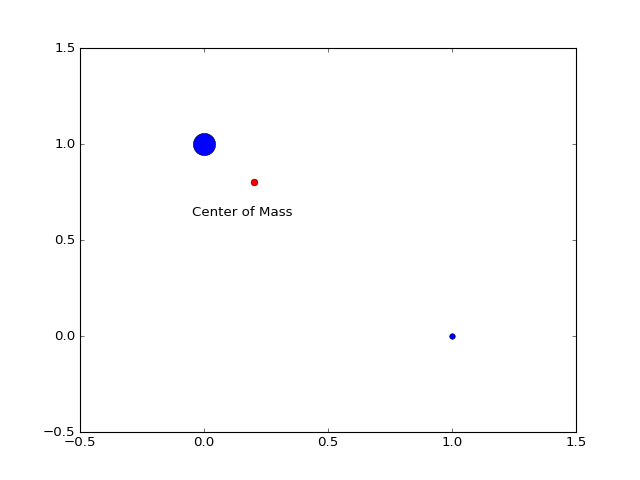

In [2]:
ax = plt.figure()
plt.plot(0, 1, 'o', color = 'blue', markersize = 20)
plt.plot(1,0, 'o', color = 'blue', markersize = 5)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.plot(0.2, 0.8, 'o', color = 'red')
ax.text(.3, 0.55, 'Center of Mass')


### 2-D Continuous Region

For this example, we consider the components $M_x, M_y, M$ and their meaning if we have a solid two dimensional region with uniform density.

<center>
mass M = area of plate
$~$
<center>
moment $M_x = \int$(distance $x$)(length of vertical strip)$dx$

<center>
moment $M_y = \int$(height $y$)(length of horizontal strip)$dy$

For example, suppose a plate has sides $x=0$, $y=0$, and the line $y=4-2x$

![](images/masses3.png)

Thus, we have:

- $M=\int_0^2 (4-2x)dx$
- $M_x = \int_0^2 x(4-2x)dx$
- $M_y = \int_0^2 y\frac{1}{2}(4-y)dy$





In [3]:
x,y = sy.symbols('x y')
sy.solve(4-2*x-y, x)

[-y/2 + 2]

In [4]:
my = sy.integrate(x*(4-2*x), (x, 0, 2))
mx = sy.integrate(y*0.5*(4-y), (y, 0, 4))
m = sy.integrate(4-2*x, (x, 0, 2))
print('Total Mass: ', m, '\nMx: ', mx,'\nMy: ', my)
print('x = ', my/m, 'y= ', mx/m)

Total Mass:  4 
Mx:  5.33333333333333 
My:  8/3
x =  2/3 y=  1.33333333333333


<IPython.core.display.Javascript object>


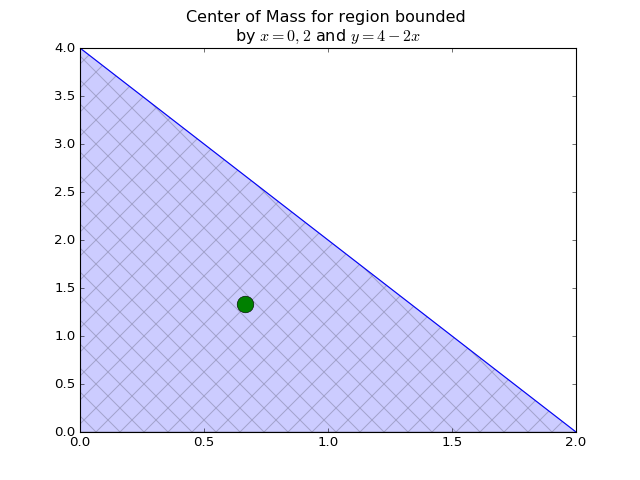

In [5]:
x = np.linspace(0,2,1000)
y = 4-2*x
ax = plt.figure()
plt.plot(x,y)
plt.fill_between(x, y, alpha =0.2, hatch='x')
plt.plot(my/m, mx/m, 'o', markersize = 15)
plt.title("Center of Mass for region bounded \nby $x=0,2$ and $y=4-2x$")